## 국내주식 잔고이력(STK_BNC_HIST)

기간 : 2016년 1월 ~ 2020년 12월
- act_id : 계좌번호 (EX. 27666E123D)
- bse_dt : 기준일자 (EX. 20200522) -> 조회
- iem_cd : 종목코드 (EX. A000100)
- bnc_qty : 잔고수량 (EX. 500), 종목 보유 잔고수량을 말한다.  -> 몇 주 가지고 있냐? 
- tot_aet_amt: 잔고금액 (EX. 945000), 종목 평가금액을 말한다. -> 주가g(날마다 바뀜) * 수량
- stk_par_pr : 액면가 (EX. 1000), 주당 액면가를 말한다. ->  기업이 주식을 최초로 발행할때 정한 주식 1주당 가격

In [403]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append('../')

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import core.config as conf
from matplotlib import rc

%matplotlib inline

In [404]:
# 맥북
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [405]:
# hist = pd.read_csv(conf.data_path + 'stk_bnc_hist.csv')
hist = pd.read_csv('~/Study/' + conf.data_path[2:] + 'stk_bnc_hist.csv')
iem = pd.read_csv('~/Study/' + conf.data_path[2:] + 'iem_info_20210902.csv')
cus = pd.read_csv('~/Study/' + conf.data_path[2:] + 'cus_info.csv')

In [406]:
hist.head()

,act_id,bse_dt,iem_cd,bnc_qty,tot_aet_amt,stk_par_pr
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0


In [407]:
iem.head()

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,A000020,동화약품,8,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,99
3,A000227,유유제약2우B,8,99,99
4,A000325,노루홀딩스우,2,99,99


In [408]:
cus.head()

,act_id,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16


## 계좌 번호 별 보유 주식 종목

- act_id : 계좌 번호 (9992개)
- iem_cd : 종목 코드

In [409]:
act_id = hist['act_id'].unique()
id_f = pd.DataFrame(act_id, columns=['act_id'])
id_f

,act_id
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...
1,66d8611661423c1e0764994be4a7afe772e70a8f7f3cd2...
2,51c0d868a0d91c15a5eefdd68fbca1d1c5e3215fcebb33...
3,dbc7f1c8694e7a40827680f9d8b8538db774a134fa24bb...
4,7a17368be2d52cf0c0bd1873748d09ebf416c437835ea1...
...,...
9987,39e431e1f1c4398e822c78420fa37cde61b521d0ae0ea9...
9988,9aca83b59ffcc920ef4d6f577e45041cf98ecc70160309...
9989,ba4c5e445f98014ba264571300430c4f4b75a81dab0256...
9990,3e51702eea7420c4c0c68831b42bc7dea1b79064df6692...


### 계좌 번호 별 보유 주식 코드 리스트 & 개수


In [410]:
df = hist[['act_id', 'iem_cd']]
id_cd_count = df.groupby('act_id')['iem_cd'].count().reset_index(name='count')
id_cd_list = df.groupby('act_id')['iem_cd'].apply(list).reset_index(name='iem_cd_list')

for i in range(9992):
    cd_list = id_cd_list['iem_cd_list'][i]
    cd_set = set(cd_list)
    count = len(cd_set)
    id_cd_list['iem_cd_list'][i] = cd_set

id_cd_list['count'] = 0
for i in range(9992):
    count = len(id_cd_list['iem_cd_list'][i])
    id_cd_list['count'][i] = count
id_cd_list

# id_cd_list[(id_cd_list['act_id'] == '1119c23c3a504ca7b75060277410c0f6fb9018ec7638c226bfff4211d8a7bde6')]
# pd.concat([id_cd_list, id_cd_count['count']], axis=1)

<ipython-input-410-6730f625fd6a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_cd_list['count'][i] = count


,act_id,iem_cd_list,count
0,0000c7a5a5a1db9c7e890da984b20d544c09cb6f51c546...,"{A079980, A093370, A104040, A033270, A247540, ...",27
1,0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa...,"{A092220, A000660, A060250, A227950, A033270, ...",32
2,0008d1bfac569bdb998897e2eb8519dec06b9277a686f4...,"{A052020, A009420, A179900, A053800, A096630, ...",51
3,000a83a961cbcbce40673aed998effbd462fb10dcac8e6...,"{A054050, A066570, A035720, A079160, A001040, ...",14
4,000b92ca83a96312a0909b1f489340f4d399c86555012f...,"{A367380, A005930, A000660, A360200, A051910, ...",6
...,...,...,...
9987,ffea89aa464a4fcf8a5416989d21deef4e748192ba17bf...,"{A034220, A066570, A153490, A082850, A037400}",5
9988,ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7ba...,"{A005360, A004770, A038340, A118990, A247540, ...",41
9989,ffee399294db1c721e010cbf3dae5c8a1f140dbaf2dcae...,"{A004370, A104040, A012800, A068270, A082800, ...",27
9990,fff7d563e388744fdc1ca90153ec0161d1345511cb9070...,"{A067630, A009420, A004770, A091090, A000995, ...",29


### 고객 라이프 Stage 별 보유 종목
- cus_info 의 고객 라이프 Stage

02: 사회초년생 (20-29세)

03: 가족형성기_남자 (30-39세 & 남자)

04: 가족형성기_여자 (30-39세 & 여자)

05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자)

06: 가족성숙기_주부 (40-59세 & 주부 & 여자 )

07: 가족성숙기_남자 (40-59세 & 기타 & 남자 )

08: 가족성숙기_여자 (40-59세 & 기타 & 여자)

09: 은퇴기 (60-69세)



In [411]:
# lsg = cus['lsg_sgm_cd']
# lsg
cus_stg = cus[['act_id', 'lsg_sgm_cd']]
cus_cd = pd.merge(cus_stg, id_cd_list, on = 'act_id')
cus_cd

,act_id,lsg_sgm_cd,iem_cd_list,count
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,3,"{A000030, A012330, A316140}",3
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,5,"{A036200, A120115, A002310, A139480, A007810, ...",69
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,5,"{A066570, A005490, A035720, A003620, A017810, ...",13
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,5,"{A103590, A038110, A086280, A005880, A000660, ...",31
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,5,"{A005450, A003310, A001120, A009830, A051500, ...",15
...,...,...,...,...
9987,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,9,"{A133690, A261220, A269540}",3
9988,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,"{A051915, A035720, A000885, A005490, A009830, ...",14
9989,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,5,"{A133690, A219480, A169950, A283580, A314250}",5
9990,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,5,"{A014910, A034730, A065450, A251270, A045520}",5


#### 고객 라이프 별 보유 종목  리스트

In [412]:
df = cus_cd[['lsg_sgm_cd', 'iem_cd_list']]
stage_cd = df.groupby('lsg_sgm_cd')['iem_cd_list'].apply(list).reset_index(name='cd_list')
stage_cd

,lsg_sgm_cd,cd_list
0,2,"[{A066570, A026960, A028050, A090430, A000660,..."
1,3,"[{A000030, A012330, A316140}, {A066910, A05137..."
2,4,"[{A052020, A029960, A043200, A215790, A228760,..."
3,5,"[{A036200, A120115, A002310, A139480, A007810,..."
4,6,"[{A031980, A027360, A138930, A087220, A093370,..."
5,7,"[{A169330, A079160, A061250, A008470, A252670,..."
6,8,"[{A052020, A067630, A092460, A009420, A200230,..."
7,9,"[{A118000, A142280, A065270, A046440, A002700,..."


### 고객 라이프 별 보유 종목 분포

#### 02: 사회초년생 (20-29세)

In [431]:
import operator
cd_list = stage_cd['cd_list'][0]
cd_list
cd_dict = {}
for i in range(len(cd_list)):
    cus_cd = list(cd_list[i])
    for j in range(len(cus_cd)):
        if cus_cd[j] in cd_dict:
            cd_dict[cus_cd[j]] += 1
        else:
            cd_dict[cus_cd[j]] = 1
# cd_dict
cd_num = sorted(cd_dict.items(), key = operator.itemgetter(1), reverse=True)
label = []
num = []
for i in range(len(cd_num)):
    label.append(cd_num[i][0])
    num.append(cd_num[i][1])

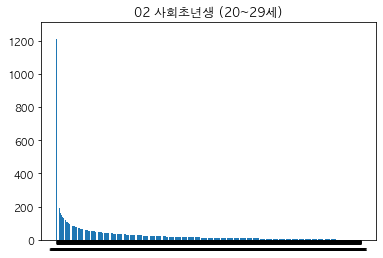

In [436]:
index = np.arange(len(label))
plt.title('02 사회초년생 (20~29세)')
plt.bar(index, num)
plt.xticks(index, label, fontsize=3) # label 이름 넣기
plt.ylim(0, max(num) + 100)
plt.show()

#### 02 사회초년생 (20~29세) : 보유 주식 개수 및 종류

In [437]:
iem_f = iem[['iem_cd','iem_krl_nm']]
test = {'iem_cd' : label, '보유 개수': num}
df = DataFrame(test)
df2 = pd.merge(iem_f, df, on='iem_cd').sort_values('보유 개수', ascending=False)
test = iem[['iem_cd', 'btp_cfc_cd']]
df3 = pd.merge(df2, test, on = 'iem_cd')

btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}
dic = {'btp_cfc_cd':list(btp_cfc_dic.keys()), 'name':list(btp_cfc_dic.values())}
temp = DataFrame(dic)

df4 = pd.merge(df3, temp, on='btp_cfc_cd')
df4
# iem_cd 는 무시해도 될 듯

,iem_cd,iem_krl_nm,보유 개수,btp_cfc_cd,name
0,A005930,삼성전자,1211,9,전기
1,A000660,SK하이닉스,546,9,전기
2,A005935,삼성전자우,488,9,전기
3,A015760,한국전력,270,9,전기
4,A026890,디피씨,204,9,전기
...,...,...,...,...,...
2477,A002787,진흥기업2우B,2,1,건설
2478,A005965,동부건설우,2,1,건설
2479,A016250,SGC이테크건설,2,1,건설
2480,A000215,DL우,1,1,건설


#### 02 사회초년생 (20~29세): 보유 주식 별 분포(주식 종류X)

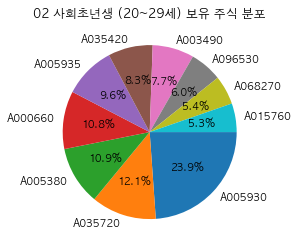

In [438]:
plt.pie(df2['보유 개수'][:10], labels = df2['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.title('02 사회초년생 (20~29세) 보유 주식 분포')
plt.show()

#### 02 사회초년생 (20~29세) : 보유 주식의 종류 별 분포

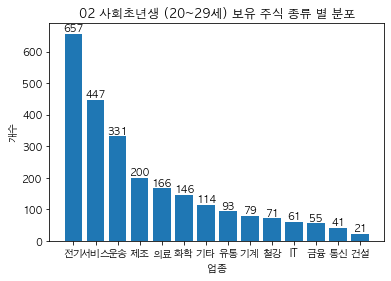

In [440]:
df4
label= list(df4['name'].unique())
idx = np.arange(len(label))
count = df4['btp_cfc_cd'].value_counts()
plt.bar(idx, count)
plt.title('02 사회초년생 (20~29세) 보유 주식 종류 별 분포')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=10)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

=============================================
=============================================

#### 03: 가족형성기_남자 (30-39세 & 남자)

In [445]:
import operator
cd_list = stage_cd['cd_list'][1]
cd_list
cd_dict = {}
for i in range(len(cd_list)):
    cus_cd = list(cd_list[i])
    for j in range(len(cus_cd)):
        if cus_cd[j] in cd_dict:
            cd_dict[cus_cd[j]] += 1
        else:
            cd_dict[cus_cd[j]] = 1
# cd_dict
cd_num = sorted(cd_dict.items(), key = operator.itemgetter(1), reverse=True)
label = []
num = []
for i in range(len(cd_num)):
    label.append(cd_num[i][0])
    num.append(cd_num[i][1])

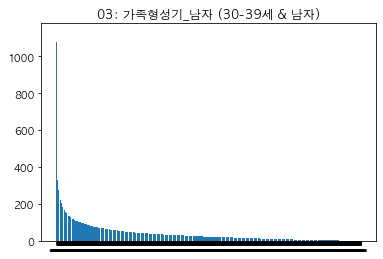

In [446]:
index = np.arange(len(label))
plt.title('03: 가족형성기_남자 (30-39세 & 남자)')
plt.bar(index, num)
plt.xticks(index, label, fontsize=3) # label 이름 넣기
plt.ylim(0, max(num) + 100)
plt.show()

####  03: 가족형성기_남자 (30-39세 & 남자) : 보유 주식 개수 및 종류

In [447]:
iem_f = iem[['iem_cd','iem_krl_nm']]
test = {'iem_cd' : label, '보유 개수': num}
df = DataFrame(test)
df2 = pd.merge(iem_f, df, on='iem_cd').sort_values('보유 개수', ascending=False)
test = iem[['iem_cd', 'btp_cfc_cd']]
df3 = pd.merge(df2, test, on = 'iem_cd')

btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}
dic = {'btp_cfc_cd':list(btp_cfc_dic.keys()), 'name':list(btp_cfc_dic.values())}
temp = DataFrame(dic)

df4 = pd.merge(df3, temp, on='btp_cfc_cd')
df4
# iem_cd 는 무시해도 될 듯

,iem_cd,iem_krl_nm,보유 개수,btp_cfc_cd,name
0,A005930,삼성전자,1079,9,전기
1,A000660,SK하이닉스,543,9,전기
2,A005935,삼성전자우,343,9,전기
3,A015760,한국전력,311,9,전기
4,A026890,디피씨,267,9,전기
...,...,...,...,...,...
2659,A002785,진흥기업우B,8,1,건설
2660,A005965,동부건설우,7,1,건설
2661,A078940,코드네이처,5,1,건설
2662,A023960,에쓰씨엔지니어링,4,1,건설


####  03: 가족형성기_남자 (30-39세 & 남자) : 보유 주식 별 분포(주식 종류X)

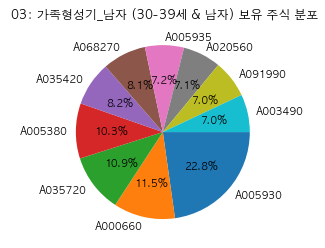

In [448]:
plt.pie(df2['보유 개수'][:10], labels = df2['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.title(' 03: 가족형성기_남자 (30-39세 & 남자) 보유 주식 분포')
plt.show()

#### 03: 가족형성기_남자 (30-39세 & 남자) : 보유 주식의 종류 별 분포

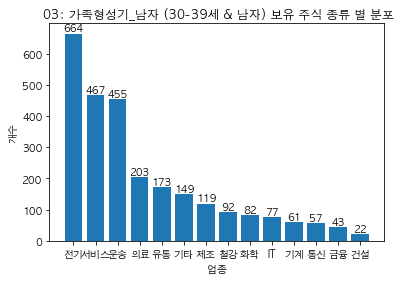

In [449]:
df4
label= list(df4['name'].unique())
idx = np.arange(len(label))
count = df4['btp_cfc_cd'].value_counts()
plt.bar(idx, count)
plt.title(' 03: 가족형성기_남자 (30-39세 & 남자) 보유 주식 종류 별 분포')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=10)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

=============================================
=============================================

#### 04: 가족형성기_여자 (30-39세 & 여자)

In [450]:
import operator
cd_list = stage_cd['cd_list'][2]
cd_list
cd_dict = {}
for i in range(len(cd_list)):
    cus_cd = list(cd_list[i])
    for j in range(len(cus_cd)):
        if cus_cd[j] in cd_dict:
            cd_dict[cus_cd[j]] += 1
        else:
            cd_dict[cus_cd[j]] = 1
# cd_dict
cd_num = sorted(cd_dict.items(), key = operator.itemgetter(1), reverse=True)
label = []
num = []
for i in range(len(cd_num)):
    label.append(cd_num[i][0])
    num.append(cd_num[i][1])

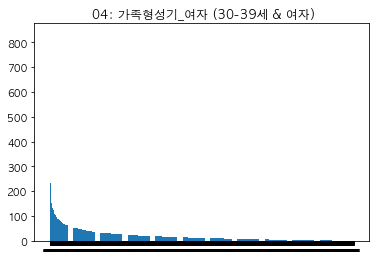

In [451]:
index = np.arange(len(label))
plt.title(' 04: 가족형성기_여자 (30-39세 & 여자)')
plt.bar(index, num)
plt.xticks(index, label, fontsize=3) # label 이름 넣기
plt.ylim(0, max(num) + 100)
plt.show()

####   04: 가족형성기_여자 (30-39세 & 여자) : 보유 주식 개수 및 종류

In [454]:
iem_f = iem[['iem_cd','iem_krl_nm']]
test = {'iem_cd' : label, '보유 개수': num}
df = DataFrame(test)
df2 = pd.merge(iem_f, df, on='iem_cd').sort_values('보유 개수', ascending=False)
test = iem[['iem_cd', 'btp_cfc_cd']]
df3 = pd.merge(df2, test, on = 'iem_cd')

btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}
dic = {'btp_cfc_cd':list(btp_cfc_dic.keys()), 'name':list(btp_cfc_dic.values())}
temp = DataFrame(dic)

df4 = pd.merge(df3, temp, on='btp_cfc_cd')
df4
# iem_cd 는 무시해도 될 듯

,iem_cd,iem_krl_nm,보유 개수,btp_cfc_cd,name
0,A005930,삼성전자,777,9,전기
1,A000660,SK하이닉스,346,9,전기
2,A005935,삼성전자우,246,9,전기
3,A066570,LG전자,154,9,전기
4,A015760,한국전력,146,9,전기
...,...,...,...,...,...
2419,A002787,진흥기업2우B,2,1,건설
2420,A011560,세보엠이씨,2,1,건설
2421,A066620,국보디자인,2,1,건설
2422,A002785,진흥기업우B,2,1,건설


####   04: 가족형성기_여자 (30-39세 & 여자) : 보유 주식 별 분포(주식 종류X)

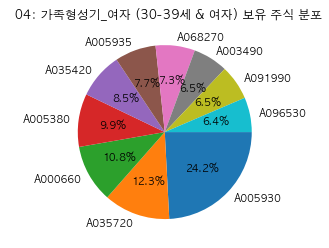

In [455]:
plt.pie(df2['보유 개수'][:10], labels = df2['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.title('  04: 가족형성기_여자 (30-39세 & 여자) 보유 주식 분포')
plt.show()

####  04: 가족형성기_여자 (30-39세 & 여자) : 보유 주식의 종류 별 분포

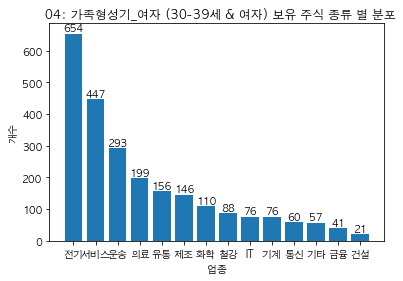

In [456]:
df4
label= list(df4['name'].unique())
idx = np.arange(len(label))
count = df4['btp_cfc_cd'].value_counts()
plt.bar(idx, count)
plt.title('  04: 가족형성기_여자 (30-39세 & 여자) 보유 주식 종류 별 분포')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=10)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

=============================================
=============================================

#### 05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자)

In [464]:
import operator
cd_list = stage_cd['cd_list'][3]
cd_list
cd_dict = {}
for i in range(len(cd_list)):
    cus_cd = list(cd_list[i])
    for j in range(len(cus_cd)):
        if cus_cd[j] in cd_dict:
            cd_dict[cus_cd[j]] += 1
        else:
            cd_dict[cus_cd[j]] = 1
# cd_dict
cd_num = sorted(cd_dict.items(), key = operator.itemgetter(1), reverse=True)
label = []
num = []
for i in range(len(cd_num)):
    label.append(cd_num[i][0])
    num.append(cd_num[i][1])

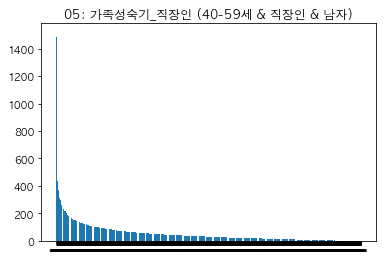

In [465]:
index = np.arange(len(label))
plt.title('05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자)')
plt.bar(index, num)
plt.xticks(index, label, fontsize=3) # label 이름 넣기
plt.ylim(0, max(num) + 100)
plt.show()

####   05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자) : 보유 주식 개수 및 종류

In [466]:
iem_f = iem[['iem_cd','iem_krl_nm']]
test = {'iem_cd' : label, '보유 개수': num}
df = DataFrame(test)
df2 = pd.merge(iem_f, df, on='iem_cd').sort_values('보유 개수', ascending=False)
test = iem[['iem_cd', 'btp_cfc_cd']]
df3 = pd.merge(df2, test, on = 'iem_cd')

btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}
dic = {'btp_cfc_cd':list(btp_cfc_dic.keys()), 'name':list(btp_cfc_dic.values())}
temp = DataFrame(dic)

df4 = pd.merge(df3, temp, on='btp_cfc_cd')
df4
# iem_cd 는 무시해도 될 듯

,iem_cd,iem_krl_nm,보유 개수,btp_cfc_cd,name
0,A005930,삼성전자,1484,9,전기
1,A000660,SK하이닉스,689,9,전기
2,A005935,삼성전자우,493,9,전기
3,A015760,한국전력,442,9,전기
4,A006400,삼성SDI,368,9,전기
...,...,...,...,...,...
2694,A002785,진흥기업우B,11,1,건설
2695,A066620,국보디자인,11,1,건설
2696,A002787,진흥기업2우B,9,1,건설
2697,A078940,코드네이처,7,1,건설


####   05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자) : 보유 주식 별 분포(주식 종류X)

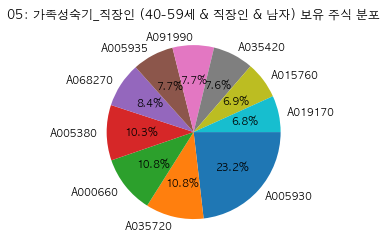

In [467]:
plt.pie(df2['보유 개수'][:10], labels = df2['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.title('05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자) 보유 주식 분포')
plt.show()

#### 05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자) : 보유 주식의 종류 별 분포

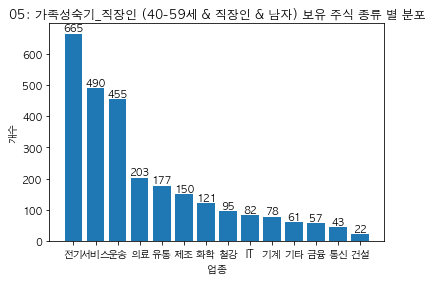

In [468]:
df4
label= list(df4['name'].unique())
idx = np.arange(len(label))
count = df4['btp_cfc_cd'].value_counts()
plt.bar(idx, count)
plt.title('05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자) 보유 주식 종류 별 분포')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=10)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

=============================================
=============================================

#### 06: 가족성숙기_주부 (40-59세 & 주부 & 여자 )

In [469]:
import operator
cd_list = stage_cd['cd_list'][4]
cd_list
cd_dict = {}
for i in range(len(cd_list)):
    cus_cd = list(cd_list[i])
    for j in range(len(cus_cd)):
        if cus_cd[j] in cd_dict:
            cd_dict[cus_cd[j]] += 1
        else:
            cd_dict[cus_cd[j]] = 1
# cd_dict
cd_num = sorted(cd_dict.items(), key = operator.itemgetter(1), reverse=True)
label = []
num = []
for i in range(len(cd_num)):
    label.append(cd_num[i][0])
    num.append(cd_num[i][1])

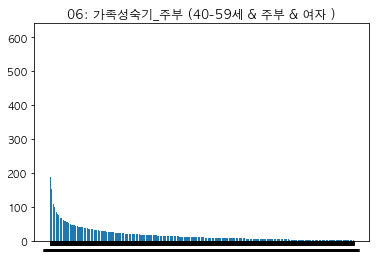

In [470]:
index = np.arange(len(label))
plt.title('06: 가족성숙기_주부 (40-59세 & 주부 & 여자 )')
plt.bar(index, num)
plt.xticks(index, label, fontsize=3) # label 이름 넣기
plt.ylim(0, max(num) + 100)
plt.show()

####   06: 가족성숙기_주부 (40-59세 & 주부 & 여자 ) : 보유 주식 개수 및 종류

In [471]:
iem_f = iem[['iem_cd','iem_krl_nm']]
test = {'iem_cd' : label, '보유 개수': num}
df = DataFrame(test)
df2 = pd.merge(iem_f, df, on='iem_cd').sort_values('보유 개수', ascending=False)
test = iem[['iem_cd', 'btp_cfc_cd']]
df3 = pd.merge(df2, test, on = 'iem_cd')

btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}
dic = {'btp_cfc_cd':list(btp_cfc_dic.keys()), 'name':list(btp_cfc_dic.values())}
temp = DataFrame(dic)

df4 = pd.merge(df3, temp, on='btp_cfc_cd')
df4
# iem_cd 는 무시해도 될 듯

,iem_cd,iem_krl_nm,보유 개수,btp_cfc_cd,name
0,A005930,삼성전자,541,9,전기
1,A000660,SK하이닉스,262,9,전기
2,A005935,삼성전자우,188,9,전기
3,A015760,한국전력,161,9,전기
4,A006400,삼성SDI,154,9,전기
...,...,...,...,...,...
2342,A036800,나이스정보통신,5,4,통신
2343,A040300,YTN,3,4,통신
2344,A051780,큐로홀딩스,3,4,통신
2345,A039340,한국경제TV,1,4,통신


####  06: 가족성숙기_주부 (40-59세 & 주부 & 여자 ) : 보유 주식 별 분포(주식 종류X)

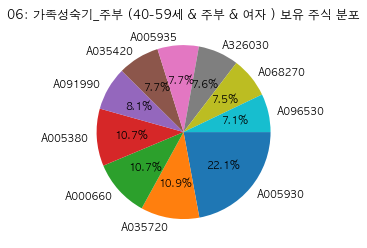

In [472]:
plt.pie(df2['보유 개수'][:10], labels = df2['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.title('06: 가족성숙기_주부 (40-59세 & 주부 & 여자 ) 보유 주식 분포')
plt.show()

#### 06: 가족성숙기_주부 (40-59세 & 주부 & 여자 ) : 보유 주식의 종류 별 분포

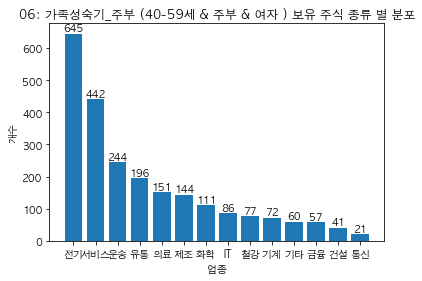

In [473]:
df4
label= list(df4['name'].unique())
idx = np.arange(len(label))
count = df4['btp_cfc_cd'].value_counts()
plt.bar(idx, count)
plt.title('06: 가족성숙기_주부 (40-59세 & 주부 & 여자 ) 보유 주식 종류 별 분포')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=10)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

=============================================
=============================================

#### 07: 가족성숙기_남자 (40-59세 & 기타 & 남자 )

In [474]:
import operator
cd_list = stage_cd['cd_list'][5]
cd_list
cd_dict = {}
for i in range(len(cd_list)):
    cus_cd = list(cd_list[i])
    for j in range(len(cus_cd)):
        if cus_cd[j] in cd_dict:
            cd_dict[cus_cd[j]] += 1
        else:
            cd_dict[cus_cd[j]] = 1
# cd_dict
cd_num = sorted(cd_dict.items(), key = operator.itemgetter(1), reverse=True)
label = []
num = []
for i in range(len(cd_num)):
    label.append(cd_num[i][0])
    num.append(cd_num[i][1])

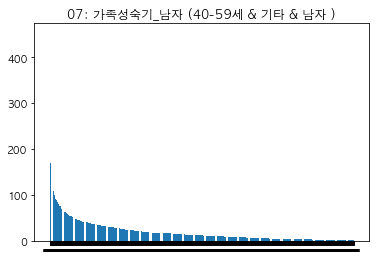

In [475]:
index = np.arange(len(label))
plt.title('07: 가족성숙기_남자 (40-59세 & 기타 & 남자 )')
plt.bar(index, num)
plt.xticks(index, label, fontsize=3) # label 이름 넣기
plt.ylim(0, max(num) + 100)
plt.show()

####  07: 가족성숙기_남자 (40-59세 & 기타 & 남자 ) : 보유 주식 개수 및 종류

In [476]:
iem_f = iem[['iem_cd','iem_krl_nm']]
test = {'iem_cd' : label, '보유 개수': num}
df = DataFrame(test)
df2 = pd.merge(iem_f, df, on='iem_cd').sort_values('보유 개수', ascending=False)
test = iem[['iem_cd', 'btp_cfc_cd']]
df3 = pd.merge(df2, test, on = 'iem_cd')

btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}
dic = {'btp_cfc_cd':list(btp_cfc_dic.keys()), 'name':list(btp_cfc_dic.values())}
temp = DataFrame(dic)

df4 = pd.merge(df3, temp, on='btp_cfc_cd')
df4
# iem_cd 는 무시해도 될 듯

,iem_cd,iem_krl_nm,보유 개수,btp_cfc_cd,name
0,A005930,삼성전자,374,9,전기
1,A000660,SK하이닉스,182,9,전기
2,A005935,삼성전자우,129,9,전기
3,A015760,한국전력,115,9,전기
4,A336260,두산퓨얼셀,113,9,전기
...,...,...,...,...,...
2458,A051780,큐로홀딩스,7,4,통신
2459,A039340,한국경제TV,7,4,통신
2460,A036800,나이스정보통신,7,4,통신
2461,A040300,YTN,4,4,통신


#### 07: 가족성숙기_남자 (40-59세 & 기타 & 남자 ) : 보유 주식 별 분포(주식 종류X)

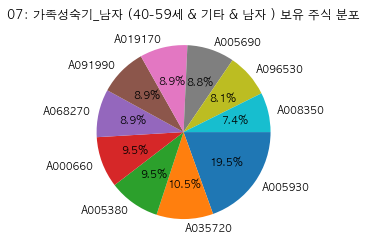

In [477]:
plt.pie(df2['보유 개수'][:10], labels = df2['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.title('07: 가족성숙기_남자 (40-59세 & 기타 & 남자 ) 보유 주식 분포')
plt.show()

#### 07: 가족성숙기_남자 (40-59세 & 기타 & 남자 ) : 보유 주식의 종류 별 분포

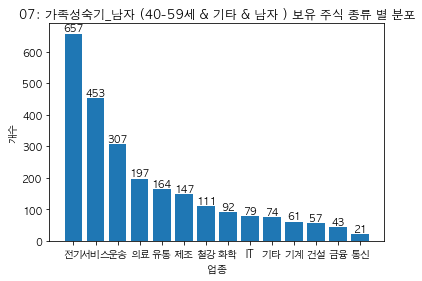

In [478]:
df4
label= list(df4['name'].unique())
idx = np.arange(len(label))
count = df4['btp_cfc_cd'].value_counts()
plt.bar(idx, count)
plt.title('07: 가족성숙기_남자 (40-59세 & 기타 & 남자 ) 보유 주식 종류 별 분포')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=10)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

=============================================
=============================================

#### 08: 가족성숙기_여자 (40-59세 & 기타 & 여자)

In [479]:
import operator
cd_list = stage_cd['cd_list'][6]
cd_list
cd_dict = {}
for i in range(len(cd_list)):
    cus_cd = list(cd_list[i])
    for j in range(len(cus_cd)):
        if cus_cd[j] in cd_dict:
            cd_dict[cus_cd[j]] += 1
        else:
            cd_dict[cus_cd[j]] = 1
# cd_dict
cd_num = sorted(cd_dict.items(), key = operator.itemgetter(1), reverse=True)
label = []
num = []
for i in range(len(cd_num)):
    label.append(cd_num[i][0])
    num.append(cd_num[i][1])

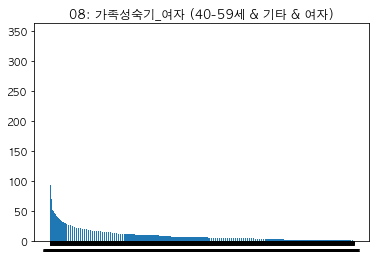

In [480]:
index = np.arange(len(label))
plt.title('08: 가족성숙기_여자 (40-59세 & 기타 & 여자)')
plt.bar(index, num)
plt.xticks(index, label, fontsize=3) # label 이름 넣기
plt.ylim(0, max(num) + 100)
plt.show()

####  08: 가족성숙기_여자 (40-59세 & 기타 & 여자) : 보유 주식 개수 및 종류

In [481]:
iem_f = iem[['iem_cd','iem_krl_nm']]
test = {'iem_cd' : label, '보유 개수': num}
df = DataFrame(test)
df2 = pd.merge(iem_f, df, on='iem_cd').sort_values('보유 개수', ascending=False)
test = iem[['iem_cd', 'btp_cfc_cd']]
df3 = pd.merge(df2, test, on = 'iem_cd')

btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}
dic = {'btp_cfc_cd':list(btp_cfc_dic.keys()), 'name':list(btp_cfc_dic.values())}
temp = DataFrame(dic)

df4 = pd.merge(df3, temp, on='btp_cfc_cd')
df4
# iem_cd 는 무시해도 될 듯

,iem_cd,iem_krl_nm,보유 개수,btp_cfc_cd,name
0,A005930,삼성전자,262,9,전기
1,A000660,SK하이닉스,126,9,전기
2,A005935,삼성전자우,96,9,전기
3,A015760,한국전력,69,9,전기
4,A006400,삼성SDI,68,9,전기
...,...,...,...,...,...
2279,A051780,큐로홀딩스,2,4,통신
2280,A036800,나이스정보통신,2,4,통신
2281,A040300,YTN,1,4,통신
2282,A115310,인포바인,1,4,통신


#### 08: 가족성숙기_여자 (40-59세 & 기타 & 여자) : 보유 주식 별 분포(주식 종류X)

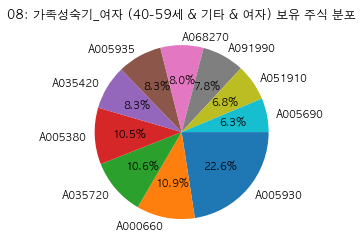

In [482]:
plt.pie(df2['보유 개수'][:10], labels = df2['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.title('08: 가족성숙기_여자 (40-59세 & 기타 & 여자) 보유 주식 분포')
plt.show()

#### 08: 가족성숙기_여자 (40-59세 & 기타 & 여자) : 보유 주식의 종류 별 분포

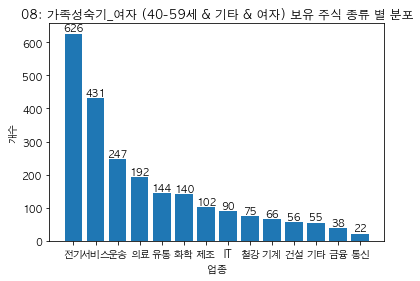

In [483]:
df4
label= list(df4['name'].unique())
idx = np.arange(len(label))
count = df4['btp_cfc_cd'].value_counts()
plt.bar(idx, count)
plt.title('08: 가족성숙기_여자 (40-59세 & 기타 & 여자) 보유 주식 종류 별 분포')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=10)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

=============================================
=============================================

#### 09: 은퇴기 (60-69세)

In [484]:
import operator
cd_list = stage_cd['cd_list'][7]
cd_list
cd_dict = {}
for i in range(len(cd_list)):
    cus_cd = list(cd_list[i])
    for j in range(len(cus_cd)):
        if cus_cd[j] in cd_dict:
            cd_dict[cus_cd[j]] += 1
        else:
            cd_dict[cus_cd[j]] = 1
# cd_dict
cd_num = sorted(cd_dict.items(), key = operator.itemgetter(1), reverse=True)
label = []
num = []
for i in range(len(cd_num)):
    label.append(cd_num[i][0])
    num.append(cd_num[i][1])

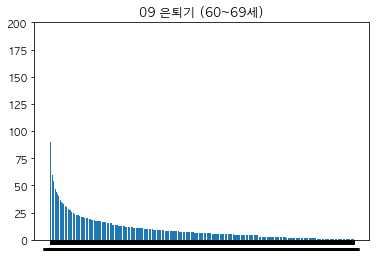

In [485]:
index = np.arange(len(label))
plt.title('09 은퇴기 (60~69세)')
plt.bar(index, num)
plt.xticks(index, label, fontsize=3) # label 이름 넣기
plt.ylim(0, 200)
plt.show()

#### 09 은퇴기(60~69세) : 보유 주식 개수 및 종류

In [486]:
iem_f = iem[['iem_cd','iem_krl_nm']]
test = {'iem_cd' : label, '보유 개수': num}
df = DataFrame(test)
df2 = pd.merge(iem_f, df, on='iem_cd').sort_values('보유 개수', ascending=False)
test = iem[['iem_cd', 'btp_cfc_cd']]
df3 = pd.merge(df2, test, on = 'iem_cd')

btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}
dic = {'btp_cfc_cd':list(btp_cfc_dic.keys()), 'name':list(btp_cfc_dic.values())}
temp = DataFrame(dic)

df4 = pd.merge(df3, temp, on='btp_cfc_cd')
df4
# iem_cd 는 무시해도 될 듯

,iem_cd,iem_krl_nm,보유 개수,btp_cfc_cd,name
0,A005930,삼성전자,236,9,전기
1,A000660,SK하이닉스,126,9,전기
2,A005935,삼성전자우,87,9,전기
3,A006400,삼성SDI,77,9,전기
4,A009150,삼성전기,64,9,전기
...,...,...,...,...,...
2314,A033830,티비씨,5,4,통신
2315,A048550,SM C&C,4,4,통신
2316,A036800,나이스정보통신,2,4,통신
2317,A040300,YTN,1,4,통신


#### 09 은퇴기(60~69세) : 보유 주식 별 분포(주식 종류X)

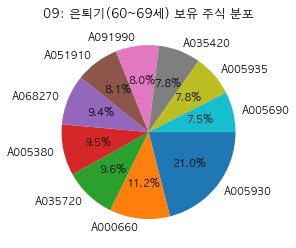

In [487]:
plt.pie(df2['보유 개수'][:10], labels = df2['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.title('09: 은퇴기(60~69세) 보유 주식 분포')
plt.show()

#### 09 은퇴기(60~69세) : 보유 주식의 종류 별 분포

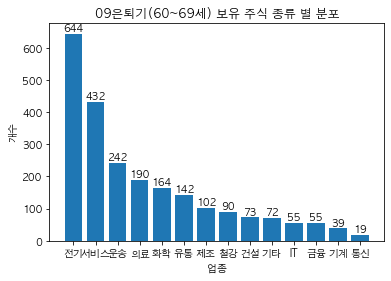

In [488]:
df4
label= list(df4['name'].unique())
idx = np.arange(len(label))
count = df4['btp_cfc_cd'].value_counts()
plt.bar(idx, count)
plt.title('09은퇴기(60~69세) 보유 주식 종류 별 분포')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=10)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

=============================================
=============================================

In [489]:
# cus_stg
# cus_stg[(cus_stg['act_id'] == '64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097067e5b41a971afa1da')]

###  고객정보의 투자성향에 따른 종목 분포도 분석하면 좋을 것 같음
투자성향 분포

01: 안정형

02: 안정추구형

03: 위험중립형

04: 적극투자형

05: 공격투자형

09: 전문투자가형

00: 정보제공미동의

99: 미정의

## 종목 코드 분포도 분석

- act_id : 계좌 번호
- iem_cd : 종목 코드
- iem_krl_nm : 종목 코드 이름

#### 종목 코드

In [419]:
hist['iem_cd'].value_counts()

A005930    61617
A000660    22483
A035720    21616
A005380    17722
A005935    17651
           ...  
A145940        1
A318590        1
A258340        1
A30703K        1
A35732K        1
Name: iem_cd, Length: 2926, dtype: int64

In [420]:
hist_f = hist['iem_cd'].value_counts().rename_axis('iem_cd').reset_index(name = 'count')
hist_f

,iem_cd,count
0,A005930,61617
1,A000660,22483
2,A035720,21616
3,A005380,17722
4,A005935,17651
...,...,...
2921,A145940,1
2922,A318590,1
2923,A258340,1
2924,A30703K,1


#### 종목 코드 이름

In [421]:
iem_f = iem[['iem_cd','iem_krl_nm']]
iem_f

,iem_cd,iem_krl_nm
0,A000020,동화약품
1,A000080,하이트진로
2,A000180,성창기업지주
3,A000227,유유제약2우B
4,A000325,노루홀딩스우
...,...,...
3074,A383310,에코프로에이치엔
3075,A385520,KODEX K-미래차액티브
3076,A388280,KBSTAR Fn컨택트대표
3077,A388420,KBSTAR 비메모리반도체액티브


#### 종목 종류 별 개수

In [422]:
iem_cdname = pd.merge(hist_f, iem_f, on = 'iem_cd')
iem_cdname

,iem_cd,count,iem_krl_nm
0,A005930,61617,삼성전자
1,A000660,22483,SK하이닉스
2,A035720,21616,카카오
3,A005380,17722,현대차
4,A005935,17651,삼성전자우
...,...,...,...
2921,A145940,1,알피니언메디칼시스템
2922,A318590,1,스탠다드그래핀
2923,A258340,1,센트롤
2924,A30703K,1,조앤강1우


#### 상위 10개 주식 종목 분포도

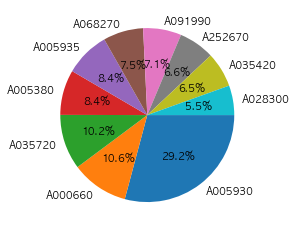

In [423]:
plt.pie(iem_cdname['count'][:10], labels = iem_cdname['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.show()

## 종목 별 주당 액면가 
- iem_cd : 종목 코드
- stk_par_pr : 액면가

In [424]:
df1 = hist[['iem_cd', 'stk_par_pr']].drop_duplicates(['iem_cd'])
df2 = pd.merge(iem_cdname, df1, on = 'iem_cd')
df2

,iem_cd,count,iem_krl_nm,stk_par_pr
0,A005930,61617,삼성전자,100.0
1,A000660,22483,SK하이닉스,5000.0
2,A035720,21616,카카오,500.0
3,A005380,17722,현대차,5000.0
4,A005935,17651,삼성전자우,5000.0
...,...,...,...,...
2921,A145940,1,알피니언메디칼시스템,500.0
2922,A318590,1,스탠다드그래핀,500.0
2923,A258340,1,센트롤,500.0
2924,A30703K,1,조앤강1우,100.0


#### 주당 액면가 분포도

- 데이터에 포함된 종목 2926개 중 주당 액면가 분포 조사

In [425]:
stk_par_pr = df2['stk_par_pr'].value_counts().rename_axis('par').reset_index(name='count')

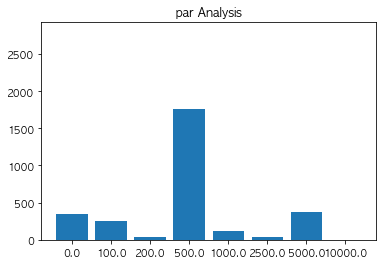

In [426]:
df_by_group = stk_par_pr.groupby(['par'])['count'].sum()
label = df_by_group.index
index = np.arange(len(label))
plt.title('par Analysis')
plt.bar(index, df_by_group)
plt.xticks(index, label, fontsize=10) # label 이름 넣기
plt.ylim(0, 2926)
plt.show()

### 계좌번호 별 보유종목의 잔고수량 및 잔고금액

- 계좌번호 / 종목코드 / 기준일자 / 잔고수량 / 잔고금액
- act_id / iem_cd / bse_dt / bnc_qty / tot_aet_amt
- 계좌번호 별 보유종목 코드 : id_cd_list (위에 있음)


In [496]:
id_cd_list

,act_id,iem_cd_list,count
0,0000c7a5a5a1db9c7e890da984b20d544c09cb6f51c546...,"{A079980, A093370, A104040, A033270, A247540, ...",27
1,0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa...,"{A092220, A000660, A060250, A227950, A033270, ...",32
2,0008d1bfac569bdb998897e2eb8519dec06b9277a686f4...,"{A052020, A009420, A179900, A053800, A096630, ...",51
3,000a83a961cbcbce40673aed998effbd462fb10dcac8e6...,"{A054050, A066570, A035720, A079160, A001040, ...",14
4,000b92ca83a96312a0909b1f489340f4d399c86555012f...,"{A367380, A005930, A000660, A360200, A051910, ...",6
...,...,...,...
9987,ffea89aa464a4fcf8a5416989d21deef4e748192ba17bf...,"{A034220, A066570, A153490, A082850, A037400}",5
9988,ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7ba...,"{A005360, A004770, A038340, A118990, A247540, ...",41
9989,ffee399294db1c721e010cbf3dae5c8a1f140dbaf2dcae...,"{A004370, A104040, A012800, A068270, A082800, ...",27
9990,fff7d563e388744fdc1ca90153ec0161d1345511cb9070...,"{A067630, A009420, A004770, A091090, A000995, ...",29


In [498]:
df = hist[['act_id', 'iem_cd', 'bse_dt', 'bnc_qty', 'tot_aet_amt']]
df

,act_id,iem_cd,bse_dt,bnc_qty,tot_aet_amt
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,A008770,20200820,40.0,2828000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,A008770,20200623,20.0,1390000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,A005940,20160104,311.0,2982490.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,A005930,20200814,40.0,2320000.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,A005930,20200623,20.0,1028000.0
...,...,...,...,...,...
2573834,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,A035720,20200806,1.0,364000.0
2573835,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,A035720,20200813,0.0,0.0
2573836,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,A035720,20200819,1.0,376500.0
2573837,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,A035720,20200825,0.0,0.0


### 기준일자 별 매매종목 확인(수정 중)

In [501]:
df[(df['iem_cd'] == 'A008770')][['bse_dt','bnc_qty','tot_aet_amt']]

,bse_dt,bnc_qty,tot_aet_amt
0,20200820,40.0,2828000.0
1,20200623,20.0,1390000.0
1179,20160104,5.0,390500.0
1259,20200527,206.0,16521200.0
1260,20200528,0.0,0.0
...,...,...,...
2571208,20200921,0.0,0.0
2573115,20200818,0.0,0.0
2573116,20201019,4.0,308800.0
2573117,20201118,0.0,0.0


In [429]:
for i in range(1):
    tmp = list(id_cd_list['iem_cd_list'][i])
    for j in range(len(tmp)):
        tmp2 = df[(df['iem_cd'] == tmp[j])][['bse_dt','bnc_qty','tot_aet_amt']]
        